<a href="https://colab.research.google.com/github/jawakeavanti/Training_Projects_AvantiJ/blob/main/Project2_Ecommerce_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
ecom_data = pd.read_csv('ecommerce_data.csv')

In [15]:
ecom_data.shape

(600000, 4)

In [16]:
ecom_data.head()

,userId,productId,rating,timestamp
0,A16XW5RBSHLYNZ,B008BKI13E,2.0,1371427200
1,A2EX65PUEWXBKW,B009YC3Y08,4.0,1397433600
2,A2Z0MB3QHPG40H,B00117LECY,1.0,1370044800
3,A3AZAD0NM6DNGQ,B003DZ168E,5.0,1300492800
4,A2M6ELKJHQE3IG,B00002NDRQ,5.0,1390867200


In [17]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     600000 non-null  object 
 1   productId  600000 non-null  object 
 2   rating     600000 non-null  float64
 3   timestamp  600000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 18.3+ MB


In [18]:
#drop timestamp column
ecom_data.drop('timestamp',axis=1,inplace=True)

In [19]:
#handling missing values
ecom_data.isnull().sum()

,0
userId,0
productId,0
rating,0


In [40]:
#unique Users
ecom_data['userId'].nunique()

529537

In [39]:
#unique Products
ecom_data['productId'].nunique()

145055

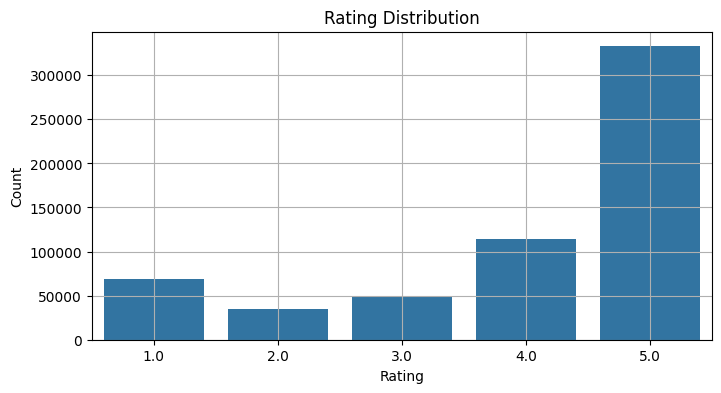

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=ecom_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [21]:
#Rating by user
no_of_rated_products_per_user = ecom_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

,rating
userId,
ADLVFFE4VBT8,47
A5JLAU2ARJ0BO,39
A6FIAB28IS79,38
A3OXHLG6DIBRW8,36
A680RUE1FDO8B,34


In [23]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 25)))

No of rated product more than 50 per user : 11 


In [24]:
no_of_rated_products_per_user.max()

47

In [ ]:
#Popularity Based recommendation

In [25]:
data=ecom_data.groupby('productId').filter(lambda x:x['rating'].count()>=25)

In [26]:
data.head()

,userId,productId,rating
1,A2EX65PUEWXBKW,B009YC3Y08,4.0
3,A3AZAD0NM6DNGQ,B003DZ168E,5.0
6,A34M3XJLYV0YJI,B00263D7A4,5.0
8,A8FNLL7SD7ZUR,B003ES5ZSW,5.0
9,A129M6QHXERWC,B007YKUWN4,4.0


In [27]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [28]:
no_of_rating_per_product.head()

,rating
productId,
B0074BW614,1402
B00DR0PDNE,1330
B007WTAJTO,1102
B006GWO5WK,958
B0019EHU8G,918


In [42]:
#top 50 product
no_of_rating_per_product.head(50)

,rating
productId,
B0074BW614,1402
B00DR0PDNE,1330
B007WTAJTO,1102
B006GWO5WK,958
B0019EHU8G,918
B003ELYQGG,901
B007R5YDYA,760
B00622AG6S,757
B003ES5ZUU,746


In [43]:
#average rating product
avg_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [44]:
avg_rating_product_count.head()

,rating
productId,
0972683275,4.360465
1400532655,4.000000
140053271X,4.241379
B00000DM9W,4.657143
B00000JI4F,3.461538


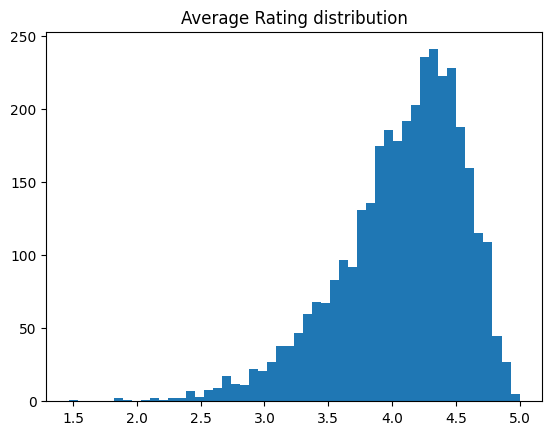

In [49]:
#plot the rating distribution of average rating product
plt.hist(avg_rating_product_count['rating'], bins = 50)
plt.title('Average Rating distribution')
plt.show()

In [50]:
#check the skewness of the mean rating data
avg_rating_product_count['rating'].skew()

-0.9416684643328899

In [ ]:
# it is negatively skewed

In [51]:
avg_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [52]:
#highest mean rating product
avg_rating_product_count[avg_rating_product_count['rating_counts']==avg_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.508559,1402


In [54]:
#min mean rating product
print('min average rating product : ',avg_rating_product_count['rating_counts'].min())
print('total min average rating products : ',avg_rating_product_count[avg_rating_product_count['rating_counts']==avg_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  25
total min average rating products :  203


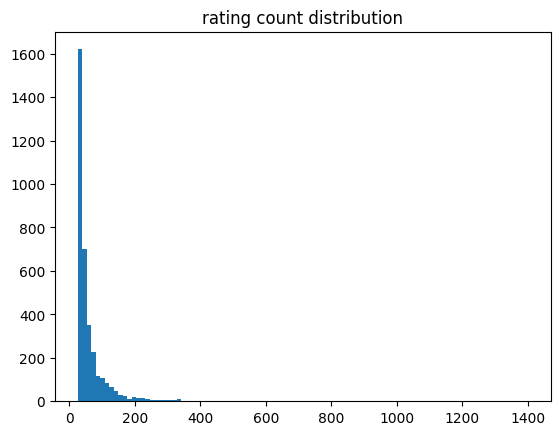

In [56]:
#plot the rating count of mean_rating_product_count
plt.hist(avg_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

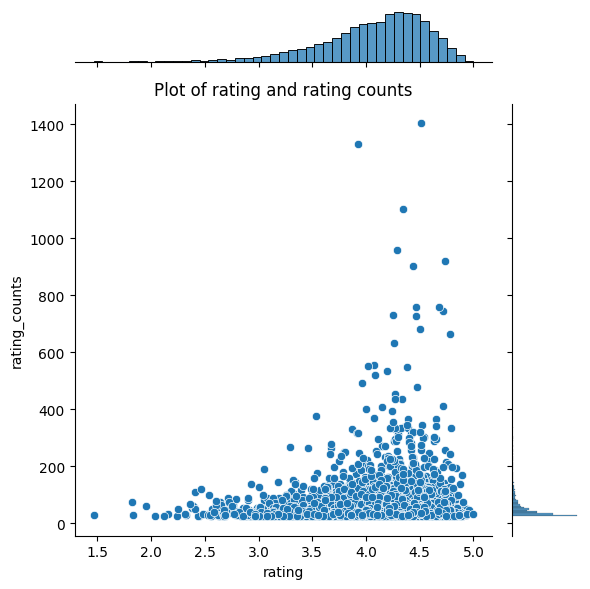

In [57]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=avg_rating_product_count)
plt.title('Plot of rating and rating counts')
plt.tight_layout()
plt.show()

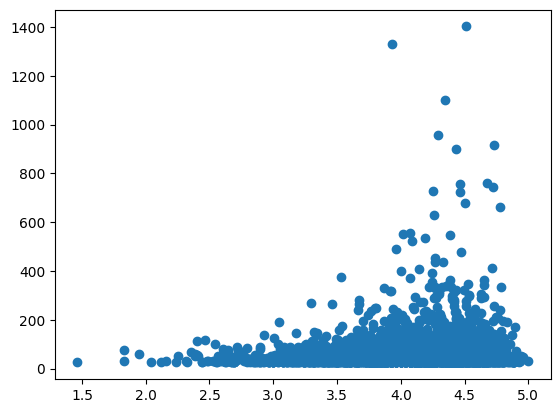

In [58]:
plt.scatter(x=avg_rating_product_count['rating'],y=avg_rating_product_count['rating_counts'])
plt.show()

In [59]:
print('Correlation between Rating and Rating Counts is : {} '.format(avg_rating_product_count['rating'].corr(avg_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.1098755092120505 


In [60]:
# Item to Item recommendation (collaborative recommendation)

In [63]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=82c81cde0ebb1e8d50dc9097a75ca2404be4dca1bfa139a08534ebfd67455750
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [64]:
#import surprise library for collebrative filtering
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [65]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [66]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [67]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [68]:
#make prediction using testset
test_pred=algo.test(testset)

In [69]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3062


1.306224509451761

In [70]:
data.head()

,userId,productId,rating
1,A2EX65PUEWXBKW,B009YC3Y08,4.0
3,A3AZAD0NM6DNGQ,B003DZ168E,5.0
6,A34M3XJLYV0YJI,B00263D7A4,5.0
8,A8FNLL7SD7ZUR,B003ES5ZSW,5.0
9,A129M6QHXERWC,B007YKUWN4,4.0


In [71]:
#Collaborative-filtering method

In [72]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000JI4F,B00000K2YR,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001W0DH,...,B00H9BEC8E,B00HNFPZF0,B00HNGB1YS,B00HTPHK5W,B00HVLUR86,B00I2ZBD1U,B00I94IPTW,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A0007264119AOT3YK1X2E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00440062OXDDICMC6M43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00576763UWM3KAYCJFCJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00936433HQTAIQZ90JQU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00953872I8UACGDL43HO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:

ratings_matrix.shape

(19885, 3406)

In [74]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0007264119AOT3YK1X2E,A00440062OXDDICMC6M43,A00576763UWM3KAYCJFCJ,A00936433HQTAIQZ90JQU,A00953872I8UACGDL43HO,A01036691ZFOFCXBLP2D1,A0118844300L72TQ87I5T,A0125769YAYJYA1B5Y9B,A02032092R3KDBOFZVIUE,A0220159ZRNBTRKLG08H,...,AZYFQBUZQVI41,AZYINYCFO08PV,AZYNSXMDWHW9P,AZYRFOFR21WJM,AZYT3AM1H0R7,AZYWFUJKR5HVM,AZYYH178CJTNE,AZZM5MUOG0LRK,AZZMRAY3BHVN8,AZZRSNMGVNY3J
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000JI4F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
x_ratings_matrix.shape

(3406, 19885)

In [76]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(3406, 10)

In [77]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3406, 3406)

In [78]:
x_ratings_matrix.index[10]

'B00001WRSJ'

In [79]:
i="B00001WRSJ"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

10


In [80]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(3406,)

In [81]:
correlation_matrix[correlation_product_ID>0.75].shape

(155, 3406)

In [82]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4XH',
 'B00001WRSJ',
 'B00004WCID',
 'B00005BC0J',
 'B00006B9CR',
 'B00006HOKR',
 'B00006IS4X',
 'B000097O5F',
 'B00009W3E2',
 'B0000VYJRY',
 'B00067LYFW',
 'B000AA2RCY',
 'B000BUEMOO',
 'B000CMS0XU',
 'B000FL9E6U',
 'B000I06JLQ',
 'B000NP3DJW',
 'B000U62N1S',
 'B000UHQVOW',
 'B000V07N9U']